# Notebook zu Blatt 8

In [6]:
%pip install numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [60]:
import PythonSorting

In [61]:
array = [7,5,8,1] 
PythonSorting.selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [62]:
array = [7,5,8,1] 
PythonSorting.quickSort(array)
print(array) # das sortierte array

[7, 5, 8, 1]


#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

All tests for `selection sort` and `quicksort` can be found in: `pythonTests.py`.
The tests are executable via python-commandline (python shell) with following command:
`python -m unittest -v pythonTests.py` (one of may possible ones).

#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [103]:
s_times, q_times = [], []
array_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in array_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    
    # getting time for selection sort
    start = time.time()
    PythonSorting.selectionSort(array)  # sorting the array via selection sort
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden

    # getting time for quicksort
    start = time.time()
    PythonSorting.quickSort(array)  # sorting the array via quicksort
    end = time.time()
    q_times.append(end-start) # die zeit in sekunden

#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

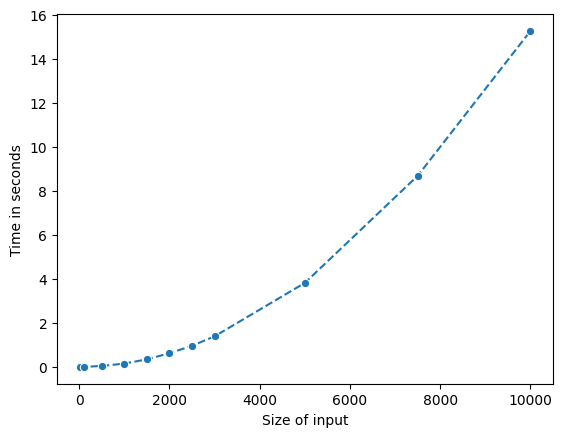

In [104]:
import matplotlib.pyplot as plt

# Plot for selection sort
x = array_sizes
y = s_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

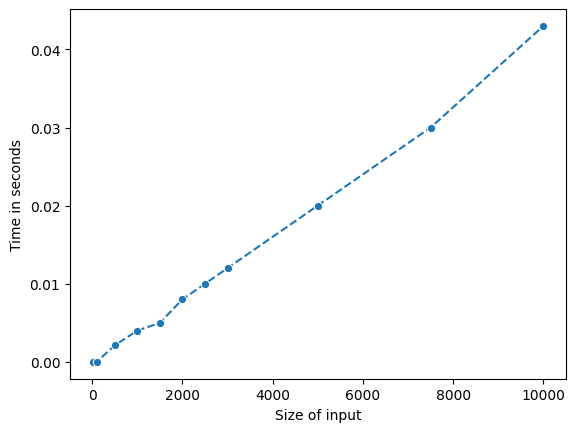

In [65]:
# Plot for qucksort
x = array_sizes
y = q_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

First we need to appoint a cost for each operation, bevore estimating the `constants`:

Lets say that all the following operations cost `1 time unit`: comparisons, variable/ list initialisations and reassignments, calls of external methods and returns.
Now we can approximate:
- `Selection sort`: For each element n, we call in total n/2 times: one comparison and, lets say half of the time its nececcary to swap elements, means one initialisation and three reassignments. Also we need to initialize i and j for the two for loops and add one for the return. => n*(n/2)*(1+(1+1+1)/2)+1 = `n*(n/2)*2.5 + 1`

- `Quicksort`: In the beginning of every quicksort call, we check if the input array is empty or contains only one element. This is n times the case for one elemten (=> n * 2) and at most n times the case for empty plus the comparison (=> n * 3). If neither is the case (still +2 comparisions), we then initailize three variables alongside two external method calls as well as three list initialisations. Below that, there is a for loop, with a toatal of n cycles for every quicksort iteration. This loop containes three comparisons, which can be averaged out as 1.5 comparisons and all of them trigger one arrayfield reassignment. In the very end there is one return statement, in which a external method is called, as well as three list assignments are made. Assume that we allways get lucky when choosing a pivot element, i.e arrMinus and arrPlus both contain roughly inputArray/2, which results in approximatly log(n) recursive calls of quicksort.
All in all this results in: n * 2 + n * 3 + n * log(n) * (2 + 3+2+3+ 1.5+1 +1+1+3) = `5 * n + 17.5 * n * log(n)` 

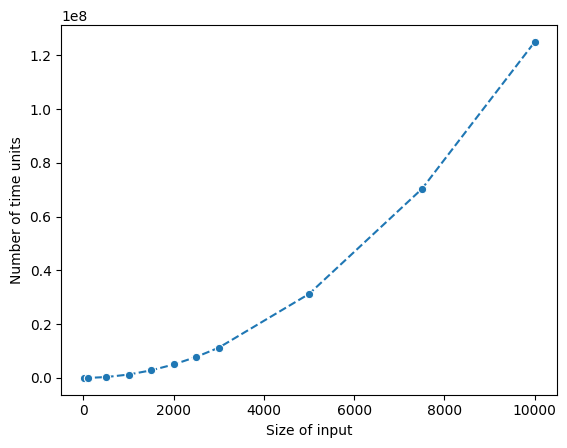

In [66]:
# Plot for selection sort
# approximated by: n*(n/2)*2.5+1    => C = 2.5
def approximation(n):
    return n*(n/2)*2.5+1

x = array_sizes
y = map(approximation, x)
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Number of time units")
plt.show()

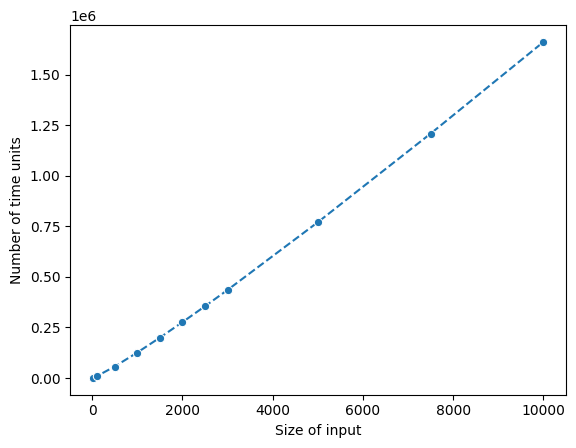

In [105]:
import math

# Plot for quicksort
# approximated by: 5 * n + 17.5 * n * log(n)    => C1 = 5 for n , and C2 = 17.5 for n * log(n)
def approximation(n):
    return 5*n+ 17.5*n*math.log(n)

x = array_sizes
y = map(approximation, x)
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Number of time units")
plt.show()

#### 8. Laufzeiten der Java implementierung von selection sort und quicksort.  

In [68]:
# The following values have been determined by running the `getRunningTime()` method for `JavaSorting`.
# The tests and reunning times can be accessed by calling `java JavaSort.java` in a console
# Also note, that a different input array was used on the java algorithms than for the python counterparts.  
j_s_times = [1.7E-6, 9.740000000000001E-5, 0.0012881000000000001, 9.457000000000001E-4, 0.0026168000000000003, 0.0019241000000000002, 0.002834, 0.0040877000000000005, 0.0113375, 0.028136800000000003, 0.0628991]
j_q_times = [9.9E-6, 1.629E-4, 5.291E-4, 2.829E-4, 4.3170000000000003E-4, 5.615E-4, 7.023E-4, 0.0040296, 0.0012297, 0.007439500000000001, 0.0087756]

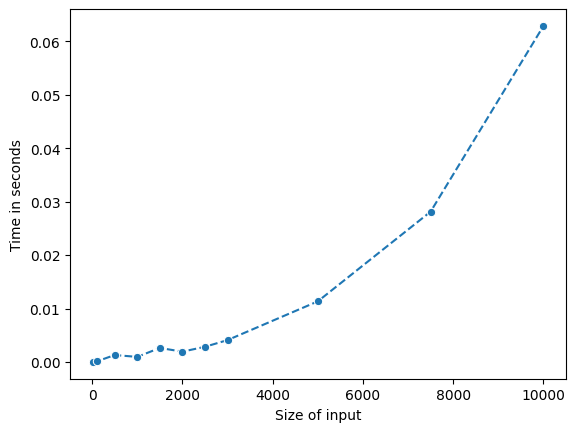

In [69]:
# Plot for java-selcetion sort
x = array_sizes
y = j_s_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

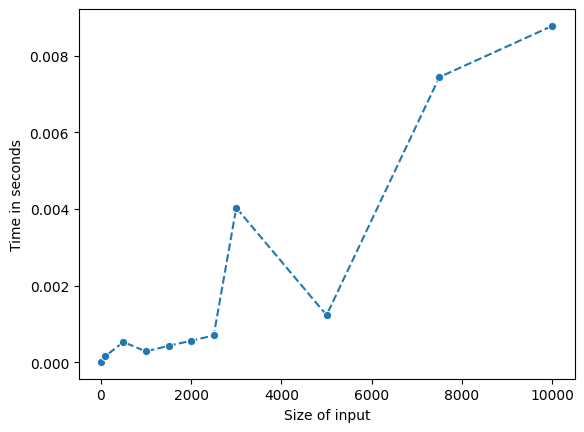

In [70]:
# Plot for java-quicksort
x = array_sizes
y = j_q_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()

##### Rough analysis: 
- For selection sort: the java implementation is `~266` times faster.
- For quicksort: the java implementation is `~5` times faster.

The comparably low speed increase for quicksort, might be due to suboptimal implementation (the choice to use arrays instead of lists as the dominant data type).

#### 9. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

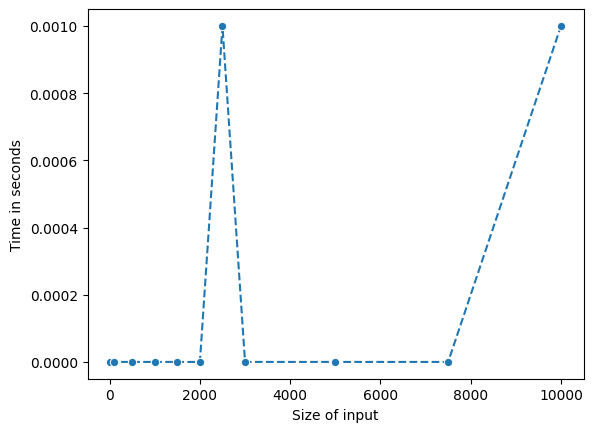

In [100]:
# the random array initialisation has been copyed here, in order to
# allow for quick refreshing of the running times of .sort()
native_times = []
for size in array_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    
    # getting time for the native .sort() function
    start = time.time()
    array.sort()    # sorting the array via native .sort() function
    end = time.time()
    native_times.append(end-start) # die zeit in sekunden

# Plot for the native .sort() function
x = array_sizes
y = native_times
sns.lineplot(x = x, y = y, linestyle="dashed", marker="o") 
plt.xlabel("Size of input")
plt.ylabel("Time in seconds")
plt.show()


##### Analysis:
Except for the occasional spike, the running time is seemingly, `not or only insegnificantly greater than 0`.

The spikes might be explained by secondary processes, that are linked to the sorting process, but don't directly take part in. It's position is also random, i.e everytime the `naive_times` are taken, the number(0-2) and location changes.

More surprisingly: the running time for each array length seem to be `equal to 0`, which seems impossible, considering what we have learned in the lecture so far. This leads to think, that something is wrong with our implementation, which we are unable to find.